In [6]:
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt

from datasets.custom_dataset import CustomDataset
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, Normalize

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


In [7]:
dataset_path = '../datasets/dataset.csv'
images_path = '../datasets/dataset_images'

dataset = pd.read_csv(dataset_path)
dataset_file_names = dataset['file_name']
dataset_labels = dataset['label']

dataset.sample(5).head()

,file_name,label
33169,Corn_diseased_33169.jpg,15
35047,Potato_diseased_35047.jpg,17
30155,Corn_diseased_30155.jpg,15
45528,Peach_healthy_45528.jpg,19
36581,no_leaf_36581.jpg,0


## Ejemplo con una muestra y un modelo random

1/1 [==============================] - 1s 680ms/step


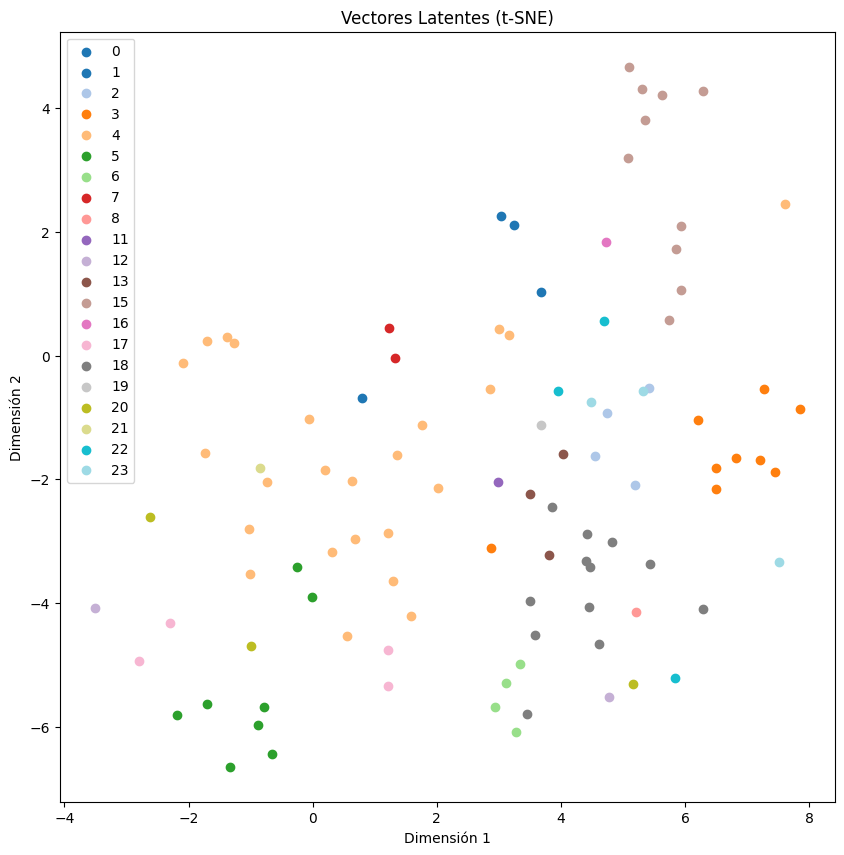

In [18]:
# Seleccionar una muestra pequeña de imágenes
num_samples = 100
sample_indices = np.random.choice(len(dataset_file_names), num_samples, replace=False)
sample_image_file_names = dataset_file_names[sample_indices]

# Cargar el modelo pre-entrenado
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Obtener características de las imágenes
image_features = []
for file_name in sample_image_file_names:
    image_path = images_path + '/' + file_name
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    features = model.predict(np.expand_dims(img, axis=0))
    image_features.append(features.flatten())

image_features = np.array(image_features)

# Aplicar t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42)
latent_tsne = tsne.fit_transform(image_features)

# Obtener etiquetas
labels = dataset['label']
sample_labels = labels[sample_indices]

# Obtener clases únicas
unique_labels = np.unique(sample_labels)
num_classes = len(unique_labels)

# Generar un color para cada clase
color_map = plt.get_cmap('tab20')

# Visualizar los vectores latentes en un gráfico 2D con colores por clase
plt.figure(figsize=(10, 10))

for i, label in enumerate(unique_labels):
    class_indices = np.where(sample_labels == label)[0]
    plt.scatter(latent_tsne[class_indices, 0], latent_tsne[class_indices, 1], color=color_map(i / num_classes), label=label)

plt.title('Vectores Latentes (t-SNE)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()


## Para el modelo real (Cambiar model)

In [ ]:
# Cargar el modelo pre-entrenado
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Obtener características de todas las imágenes
image_features = []
for file_name in dataset_file_names:
    image_path = images_path + '/' + file_name
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    features = model.predict(np.expand_dims(img, axis=0))
    image_features.append(features.flatten())

image_features = np.array(image_features)

# Aplicar t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42)
latent_tsne = tsne.fit_transform(image_features)

# Obtener etiquetas
labels = dataset['label']

# Obtener clases únicas
unique_labels = np.unique(labels)
num_classes = len(unique_labels)

# Generar un color para cada clase
color_map = plt.get_cmap('tab20')

# Visualizar los vectores latentes en un gráfico 2D con colores por clase
plt.figure(figsize=(10, 10))

for i, label in enumerate(unique_labels):
    class_indices = np.where(labels == label)[0]
    plt.scatter(latent_tsne[class_indices, 0], latent_tsne[class_indices, 1], color=color_map(i / num_classes), label=label)

plt.title('Vectores Latentes (t-SNE)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()